In [1]:
# Importing Pandas and every other libraries we will be using for this analysis
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Load dataset file
covid_data = pd.read_csv(r"C:\Users\Dell\Desktop\Python\Juppython\CORD-19\full_grouped.csv")
population_data = pd.read_csv(r"C:\Users\Dell\Desktop\Python\Juppython\CORD-19\worldometer_data.csv")

In [3]:
covid_data

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [4]:
population_data

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [5]:
covid_data.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

In [6]:
population_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [7]:
# Ensure the column names in both datasets (covid_data and Population data) match exactly
covid_data['Country/Region'] = covid_data['Country/Region'].str.strip()
population_data['Country/Region'] = population_data['Country/Region'].str.strip()

In [8]:
# Compare the unique country names in both datasets to identify mismatches
covid_countries = set(covid_data['Country/Region'])
population_countries = set(population_data['Country/Region'])
missing_in_population = covid_countries - population_countries
print(missing_in_population)

{'Congo (Kinshasa)', 'United Kingdom', 'United Arab Emirates', 'Burma', 'US', 'Saint Vincent and the Grenadines', 'Taiwan*', 'Central African Republic', 'China', 'West Bank and Gaza', 'South Korea', 'Congo (Brazzaville)', 'Holy See', 'Kosovo', "Cote d'Ivoire"}


In [9]:
# Create a mapping dictionary to rename the countries in the 'covid_data':

country_name_mapping = {
    'Congo (Brazzaville)': 'Republic of the Congo',
    'Congo (Kinshasa)': 'Democratic Republic of the Congo',
    "Cote d'Ivoire": 'Ivory Coast',
    'South Korea': 'Korea, South',
    'Central African Republic': 'Central African Rep.',
    'Kosovo': 'Kosovo',
    'Holy See': 'Vatican City',
    'Saint Vincent and the Grenadines': 'St. Vincent & Grenadines',
    'Burma': 'Myanmar',
    'United Kingdom': 'UK',
    'Taiwan*': 'Taiwan',
    'US': 'United States',
    'China': 'China',
    'West Bank and Gaza': 'Palestine',
    'United Arab Emirates': 'UAE'
}

In [10]:
# Apply the mapping to the 'covid_data'

covid_data['Country/Region'] = covid_data['Country/Region'].replace(country_name_mapping)


In [11]:
# RE-check if mismatch is resolved
covid_countries = set(covid_data['Country/Region'])
population_countries = set(population_data['Country/Region'])
missing_in_population = covid_countries - population_countries
print(missing_in_population)

{'St. Vincent & Grenadines', 'Republic of the Congo', 'United States', 'Korea, South', 'Democratic Republic of the Congo', 'Central African Rep.', 'China', 'Kosovo'}


In [12]:
covid_countries = set(covid_data['Country/Region'])
population_countries = set(population_data['Country/Region'])
missing_in_population =  population_countries - covid_countries #check the difference in population_data and covid_data
print(missing_in_population)


{'Isle of Man', 'Congo', 'French Polynesia', 'CAR', 'Cayman Islands', 'Montserrat', 'Channel Islands', 'Martinique', 'Faeroe Islands', 'Curaçao', 'Turks and Caicos', 'Hong Kong', 'St. Vincent Grenadines', 'Macao', 'Saint Martin', 'Falkland Islands', 'Mayotte', 'Aruba', 'Gibraltar', 'DRC', 'Sint Maarten', 'Guadeloupe', 'USA', 'French Guiana', 'Diamond Princess', 'S. Korea', 'New Caledonia', 'Bermuda', 'Caribbean Netherlands', 'Réunion'}


In [13]:
# Update and extend the mapping dictionary to address the new mismatches
country_name_mapping = {
    # Mismatches identified in covid_countries - population_countries
    'Republic of the Congo': 'Congo',
    'Democratic Republic of the Congo': 'DRC',
    'Central African Rep.': 'CAR',
    'Kosovo': 'Kosovo',
    'United States': 'USA',
    'China': 'China',
    'Korea, South': 'S. Korea',
    'St. Vincent & Grenadines': 'St. Vincent Grenadines',

    # Mismatches identified in population_countries - covid_countries
    'Saint Martin': 'St. Martin',
    'Diamond Princess': None, 
    'Réunion': 'Reunion',
    'Isle of Man': None,  
    'Guadeloupe': None, 
    'Aruba': None,
    'Macao': 'Macau',
    'New Caledonia': None,  
    'French Polynesia': None,
    'Bermuda': None,
    'Montserrat': None,
    'French Guiana': None,
    'Sint Maarten': 'St. Martin',
    'Faeroe Islands': 'Faroe Islands',
    'Channel Islands': None,
    'Turks and Caicos': None,
    'Hong Kong': 'Hong Kong',
    'Cayman Islands': None,
}

In [14]:
# Apply the mapping to the 'covid_data'

covid_data['Country/Region'] = covid_data['Country/Region'].replace(country_name_mapping)

In [15]:
# Apply the mapping to the 'population_data'

population_data['Country/Region'] = population_data['Country/Region'].replace(country_name_mapping)

In [16]:
# RE-check if mismatch is resolved for covid_data - population_data
covid_countries = set(covid_data['Country/Region'])
population_countries = set(population_data['Country/Region'])
missing_in_population = covid_countries - population_countries
print(missing_in_population)

{'China', 'Kosovo'}


In [17]:
# RE-check if mismatch is resolved for population_data - covid_data
covid_countries = set(covid_data['Country/Region'])
population_countries = set(population_data['Country/Region'])
missing_in_population =  population_countries - covid_countries
print(missing_in_population)

{None, 'Martinique', 'Mayotte', 'St. Martin', 'Curaçao', 'Gibraltar', 'Faroe Islands', 'Caribbean Netherlands', 'Reunion', 'Hong Kong', 'Macau', 'Falkland Islands'}


In [18]:
# Manually adding China to the population dataset
china_data = pd.DataFrame([{
    'Country/Region': 'China',
    'Population': 1402112000}])

In [19]:
china_data

,Country/Region,Population
0,China,1402112000


In [20]:
# Append using pd.concat
population_data = pd.concat([population_data, china_data], ignore_index=True)

In [21]:
population_data.tail()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
205,Caribbean Netherlands,North America,2.624700e+04,13.0,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13.0,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12.0,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe
208,Western Sahara,Africa,5.986820e+05,10.0,NaN,1.0,NaN,8.0,NaN,1.0,NaN,17.0,2.0,NaN,NaN,Africa
209,China,NaN,1.402112e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# RE-check if mismatch is resolved for covid_data - population_data
covid_countries = set(covid_data['Country/Region'])
population_countries = set(population_data['Country/Region'])
missing_in_population = covid_countries - population_countries
print(missing_in_population)

{'Kosovo'}


In [23]:
# Drop remaining mismatches
covid_data = covid_data[covid_data['Country/Region'].isin(population_countries)]
population_data = population_data[population_data['Country/Region'].isin(covid_countries)]

In [24]:
population_data

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179.0,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562.0,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409.0,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894.0,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184.0,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Saint Kitts and Nevis,North America,5.323700e+04,17.0,NaN,NaN,NaN,16.0,NaN,1.0,NaN,319.0,NaN,1146.0,21526.0,Americas
203,Greenland,North America,5.678000e+04,14.0,NaN,NaN,NaN,14.0,NaN,0.0,NaN,247.0,NaN,5977.0,105266.0,Europe
207,Vatican City,Europe,8.010000e+02,12.0,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe
208,Western Sahara,Africa,5.986820e+05,10.0,NaN,1.0,NaN,8.0,NaN,1.0,NaN,17.0,2.0,NaN,NaN,Africa


In [25]:
covid_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [26]:
# Re-check the mismatches for covid_data - population_data
missing_in_population = set(covid_data['Country/Region']) - set(population_data['Country/Region'])
print("Still missing in population:", missing_in_population)

Still missing in population: set()


In [27]:
# Re-check the mismatches for population_data - covid_data
missing_in_population = set(population_data['Country/Region']) - set(covid_data['Country/Region'])
print("Still missing in population:", missing_in_population)

Still missing in population: set()


In [28]:
df = pd.merge(covid_data, population_data[['Country/Region', 'Population']],
                         on='Country/Region', how='left')

In [29]:
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Population
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,39009447.0
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,2877470.0
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,43926079.0
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,77278.0
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,32956300.0
...,...,...,...,...,...,...,...,...,...,...,...
34963,2020-07-27,Palestine,10621,78,3752,6791,152,2,0,Eastern Mediterranean,5112340.0
34964,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,598682.0
34965,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,29886897.0
34966,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,18430129.0


In [30]:
# Display all rows
# df = pd.set_option("display.max_rows", None)
# df

# Revert to the default 
# pd.reset_option("display.max_rows")
# df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Population
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,39009447.0
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,2877470.0
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,43926079.0
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,77278.0
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,32956300.0
...,...,...,...,...,...,...,...,...,...,...,...
34963,2020-07-27,Palestine,10621,78,3752,6791,152,2,0,Eastern Mediterranean,5112340.0
34964,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,598682.0
34965,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,29886897.0
34966,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,18430129.0


In [31]:
# Inspect the data
# To understand the structure and types of columns 
print("Data Set Shape: ",df.shape)
print()
df.info()

Data Set Shape:  (34968, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34968 entries, 0 to 34967
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            34968 non-null  object 
 1   Country/Region  34968 non-null  object 
 2   Confirmed       34968 non-null  int64  
 3   Deaths          34968 non-null  int64  
 4   Recovered       34968 non-null  int64  
 5   Active          34968 non-null  int64  
 6   New cases       34968 non-null  int64  
 7   New deaths      34968 non-null  int64  
 8   New recovered   34968 non-null  int64  
 9   WHO Region      34968 non-null  object 
 10  Population      34968 non-null  float64
dtypes: float64(1), int64(7), object(3)
memory usage: 2.9+ MB


In [32]:
# Convert 'Date' to datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [33]:
df.dtypes


Date              datetime64[ns]
Country/Region            object
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
New cases                  int64
New deaths                 int64
New recovered              int64
WHO Region                object
Population               float64
dtype: object

In [34]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
Population        0
dtype: int64

In [35]:
# Check if there duplicates in the rows

df.duplicated().sum()

0

In [36]:
df.to_csv('covid_data.csv', index=False)

In [37]:
df.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region', 'Population'],
      dtype='object')

In [38]:
# Validate numerical data: Ensure all numeric values are non-negative
numeric_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 
                   'New cases', 'New deaths', 'New recovered', 'Population']
for col in numeric_columns:
    df[col] = df[col].clip(lower=0)

In [39]:
# Standardize text columns
df['Country/Region'] = df['Country/Region'].str.strip()
df['WHO Region'] = df['WHO Region'].str.strip()

In [40]:
# Transformation
# Daily growth rate feature
df['Daily Growth Rate (%)'] = df['New cases'] / df['Confirmed'].replace(0, pd.NA) * 100

In [41]:
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Population,Daily Growth Rate (%)
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,39009447.0,<NA>
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,2877470.0,<NA>
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,43926079.0,<NA>
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,77278.0,<NA>
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,32956300.0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
34963,2020-07-27,Palestine,10621,78,3752,6791,152,2,0,Eastern Mediterranean,5112340.0,1.431127
34964,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,598682.0,0.0
34965,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,29886897.0,0.591366
34966,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,18430129.0,1.559754


In [42]:
# Mortality and recovery ratios 
df['Mortality Ratio'] = df['Deaths'] / df['Confirmed'].replace(0, pd.NA)
df['Recovery Ratio'] = df['Recovered'] / df['Confirmed'].replace(0, pd.NA)

In [43]:
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Population,Daily Growth Rate (%),Mortality Ratio,Recovery Ratio
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,39009447.0,<NA>,<NA>,<NA>
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,2877470.0,<NA>,<NA>,<NA>
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,43926079.0,<NA>,<NA>,<NA>
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,77278.0,<NA>,<NA>,<NA>
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,32956300.0,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34963,2020-07-27,Palestine,10621,78,3752,6791,152,2,0,Eastern Mediterranean,5112340.0,1.431127,0.007344,0.353262
34964,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,598682.0,0.0,0.1,0.8
34965,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,29886897.0,0.591366,0.28563,0.492608
34966,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,18430129.0,1.559754,0.030756,0.618409


In [44]:
# Create new column to calculate cases per 1,000 people:
df['Cases per 1,000'] = df['Confirmed'] / (df['Population'] / 1000)

In [45]:
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Population,Daily Growth Rate (%),Mortality Ratio,Recovery Ratio,"Cases per 1,000"
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,39009447.0,<NA>,<NA>,<NA>,0.000000
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,2877470.0,<NA>,<NA>,<NA>,0.000000
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,43926079.0,<NA>,<NA>,<NA>,0.000000
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,77278.0,<NA>,<NA>,<NA>,0.000000
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,32956300.0,<NA>,<NA>,<NA>,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34963,2020-07-27,Palestine,10621,78,3752,6791,152,2,0,Eastern Mediterranean,5112340.0,1.431127,0.007344,0.353262,2.077522
34964,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,598682.0,0.0,0.1,0.8,0.016703
34965,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,29886897.0,0.591366,0.28563,0.492608,0.056580
34966,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,18430129.0,1.559754,0.030756,0.618409,0.246987


In [46]:
# Create new column to calculate death per 1,000 people:
df['Deaths per 1,000'] = df['Deaths'] / (df['Population'] / 1000)
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Population,Daily Growth Rate (%),Mortality Ratio,Recovery Ratio,"Cases per 1,000","Deaths per 1,000"
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,39009447.0,<NA>,<NA>,<NA>,0.000000,0.000000
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,2877470.0,<NA>,<NA>,<NA>,0.000000,0.000000
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,43926079.0,<NA>,<NA>,<NA>,0.000000,0.000000
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,77278.0,<NA>,<NA>,<NA>,0.000000,0.000000
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,32956300.0,<NA>,<NA>,<NA>,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34963,2020-07-27,Palestine,10621,78,3752,6791,152,2,0,Eastern Mediterranean,5112340.0,1.431127,0.007344,0.353262,2.077522,0.015257
34964,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,598682.0,0.0,0.1,0.8,0.016703,0.001670
34965,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,29886897.0,0.591366,0.28563,0.492608,0.056580,0.016161
34966,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,18430129.0,1.559754,0.030756,0.618409,0.246987,0.007596


In [47]:
# Create new column to calculate recoveries per 1,000 people:

df['Recoveries per 1,000'] = df['Recovered'] / (df['Population'] / 1000)
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Population,Daily Growth Rate (%),Mortality Ratio,Recovery Ratio,"Cases per 1,000","Deaths per 1,000","Recoveries per 1,000"
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,39009447.0,<NA>,<NA>,<NA>,0.000000,0.000000,0.000000
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,2877470.0,<NA>,<NA>,<NA>,0.000000,0.000000,0.000000
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,43926079.0,<NA>,<NA>,<NA>,0.000000,0.000000,0.000000
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,77278.0,<NA>,<NA>,<NA>,0.000000,0.000000,0.000000
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,32956300.0,<NA>,<NA>,<NA>,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34963,2020-07-27,Palestine,10621,78,3752,6791,152,2,0,Eastern Mediterranean,5112340.0,1.431127,0.007344,0.353262,2.077522,0.015257,0.733910
34964,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,598682.0,0.0,0.1,0.8,0.016703,0.001670,0.013363
34965,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,29886897.0,0.591366,0.28563,0.492608,0.056580,0.016161,0.027872
34966,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,18430129.0,1.559754,0.030756,0.618409,0.246987,0.007596,0.152739


In [48]:
# Check for infinite values in the entire DataFrame
inf_values = (df == float('inf')) | (df == -float('inf'))

# Sum up the True values in the DataFrame to count how many infinities exist
inf_count = inf_values.sum().sum()

# If there are any infinite values, it will show the count
if inf_count > 0:
    print(f"There are {inf_count} infinite values in the dataset.")
else:
    print("No infinite values found in the dataset.")


No infinite values found in the dataset.


## Look for anomalies like very high ratios (e.g., cases, deaths, or recoveries per 1,000 people) or zero population values

In [49]:
# Identify rows where population is zero or missing
zero_population = df[df['Population'] == 0]
print("Countries/Regions with zero population:\n", zero_population)

Countries/Regions with zero population:
 Empty DataFrame
Columns: [Date, Country/Region, Confirmed, Deaths, Recovered, Active, New cases, New deaths, New recovered, WHO Region, Population, Daily Growth Rate (%), Mortality Ratio, Recovery Ratio, Cases per 1,000, Deaths per 1,000, Recoveries per 1,000]
Index: []


In [50]:
# Identify countries with extreme ratios 
high_cases = df[df['Cases per 1,000'] > 1000]
high_deaths = df[df['Deaths per 1,000'] > 1000]
high_recoveries = df[df['Recoveries per 1,000'] > 1000]

print("Countries/Regions with high cases per 1,000:\n", high_cases)
print("Countries/Regions with high deaths per 1,000:\n", high_deaths)
print("Countries/Regions with high recoveries per 1,000:\n", high_recoveries)


Countries/Regions with high cases per 1,000:
 Empty DataFrame
Columns: [Date, Country/Region, Confirmed, Deaths, Recovered, Active, New cases, New deaths, New recovered, WHO Region, Population, Daily Growth Rate (%), Mortality Ratio, Recovery Ratio, Cases per 1,000, Deaths per 1,000, Recoveries per 1,000]
Index: []
Countries/Regions with high deaths per 1,000:
 Empty DataFrame
Columns: [Date, Country/Region, Confirmed, Deaths, Recovered, Active, New cases, New deaths, New recovered, WHO Region, Population, Daily Growth Rate (%), Mortality Ratio, Recovery Ratio, Cases per 1,000, Deaths per 1,000, Recoveries per 1,000]
Index: []
Countries/Regions with high recoveries per 1,000:
 Empty DataFrame
Columns: [Date, Country/Region, Confirmed, Deaths, Recovered, Active, New cases, New deaths, New recovered, WHO Region, Population, Daily Growth Rate (%), Mortality Ratio, Recovery Ratio, Cases per 1,000, Deaths per 1,000, Recoveries per 1,000]
Index: []


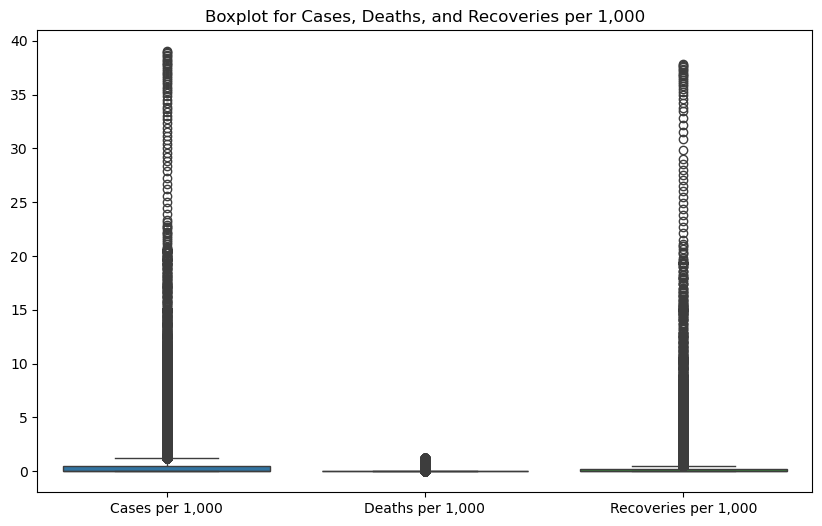

In [51]:

# Create a boxplot for key ratios
plt.figure(figsize=(10, 6))
sns.boxplot(data= df[['Cases per 1,000', 'Deaths per 1,000', 'Recoveries per 1,000']])
plt.title('Boxplot for Cases, Deaths, and Recoveries per 1,000')
plt.show()


In [52]:
# # Step 1: Summary Statistics and Distribution Check

# # Compute summary statistics for numerical columns
# summary_statistics = df.describe()

# # Preview distributions: List numerical columns for further visualization
# numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# # Summary statistics and numerical columns for distribution checks
# summary_statistics, numerical_columns


## Overview of Data

In [53]:
#Summary Statistics and Distribution Check

# Compute summary statistics for numerical columns
summary_statistics = df.describe()


In [54]:

# List numerical columns for further distribution checks
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [55]:
# Output the summary statistics and numerical columns
print("Summary Statistics:")
print(summary_statistics)

print("\nNumerical Columns for Distribution Analysis:")
print(numerical_columns)


Summary Statistics:
                                Date     Confirmed         Deaths  \
count                          34968  3.496800e+04   34968.000000   
mean   2020-04-24 12:00:00.000000256  2.368687e+04    1240.553477   
min              2020-01-22 00:00:00  0.000000e+00       0.000000   
25%              2020-03-08 18:00:00  1.000000e+00       0.000000   
50%              2020-04-24 12:00:00  2.490000e+02       4.000000   
75%              2020-06-10 06:00:00  3.696000e+03      79.000000   
max              2020-07-27 00:00:00  4.290259e+06  148011.000000   
std                              NaN  1.503754e+05    7456.676766   

          Recovered        Active     New cases    New deaths  New recovered  \
count  3.496800e+04  3.496800e+04  34968.000000  34968.000000   34968.000000   
mean   1.110404e+04  1.134228e+04    471.675217     18.763126     271.821666   
min    0.000000e+00  0.000000e+00      0.000000      0.000000       0.000000   
25%    0.000000e+00  0.000000e+00     

In [56]:
df.fillna(0, inplace=True)
df

C:\Users\Dell\AppData\Local\Temp\ipykernel_15428\2784443372.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0, inplace=True)


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Population,Daily Growth Rate (%),Mortality Ratio,Recovery Ratio,"Cases per 1,000","Deaths per 1,000","Recoveries per 1,000"
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,39009447.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,2877470.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,43926079.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,77278.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,32956300.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34963,2020-07-27,Palestine,10621,78,3752,6791,152,2,0,Eastern Mediterranean,5112340.0,1.431127,0.007344,0.353262,2.077522,0.015257,0.733910
34964,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,598682.0,0.000000,0.100000,0.800000,0.016703,0.001670,0.013363
34965,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,29886897.0,0.591366,0.285630,0.492608,0.056580,0.016161,0.027872
34966,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,18430129.0,1.559754,0.030756,0.618409,0.246987,0.007596,0.152739


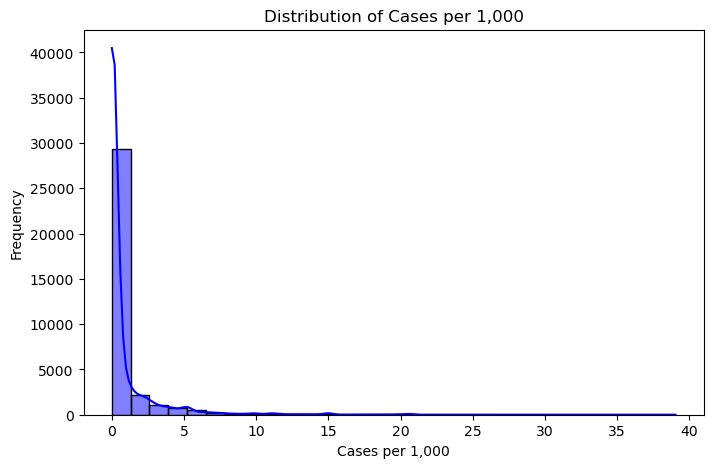

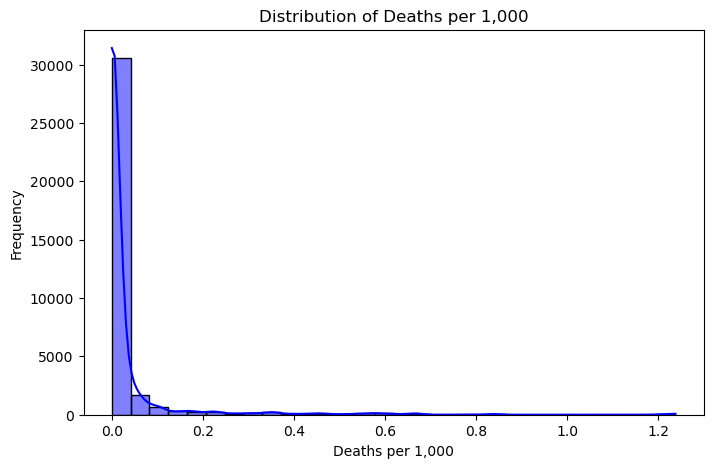

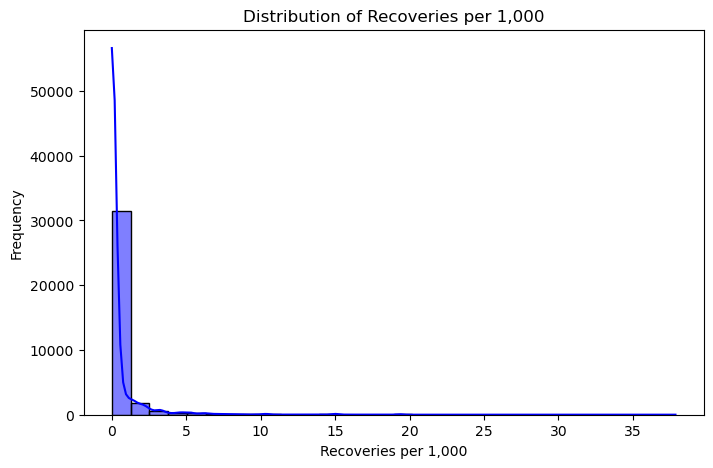

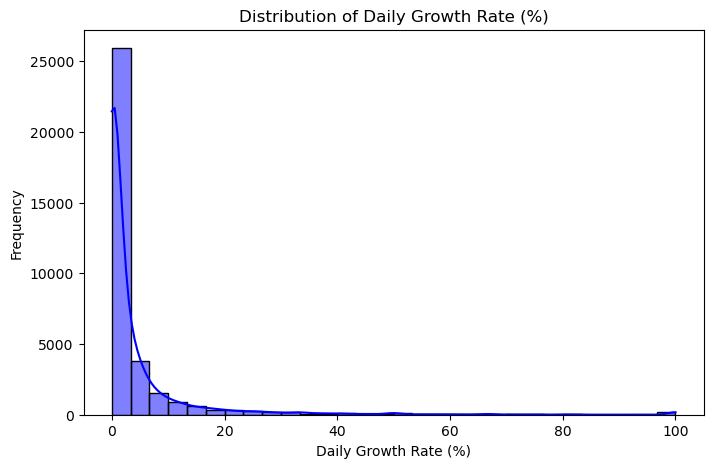

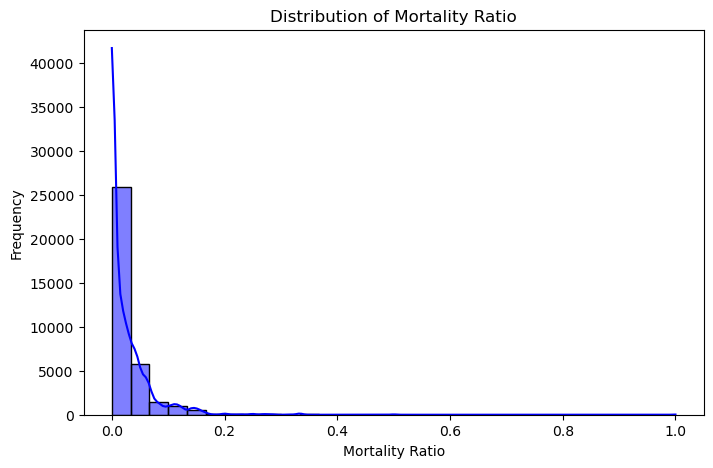

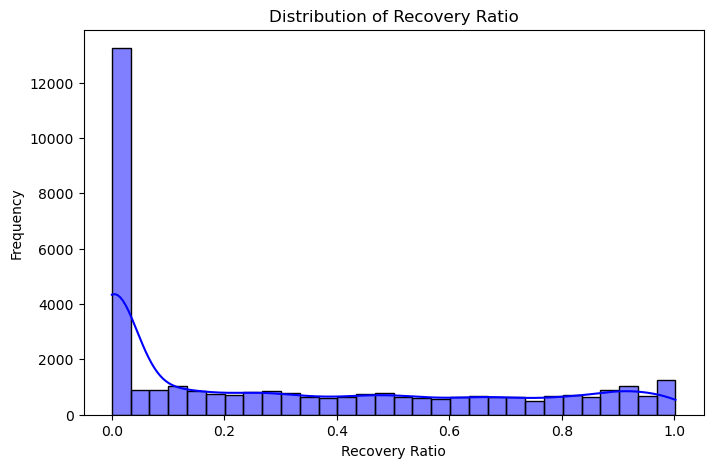

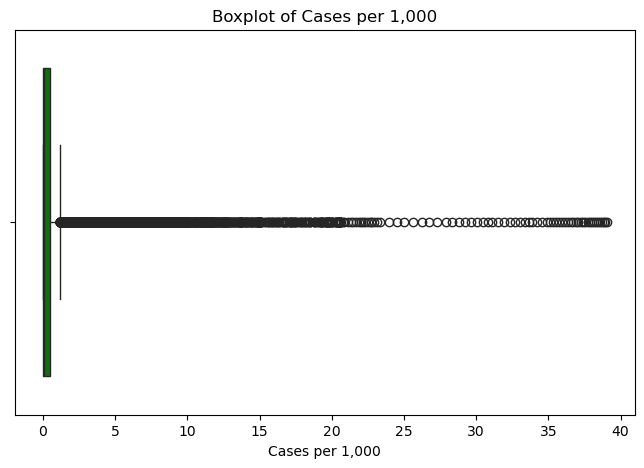

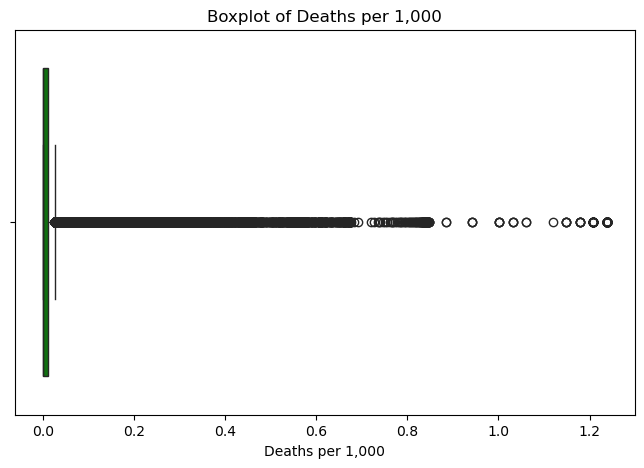

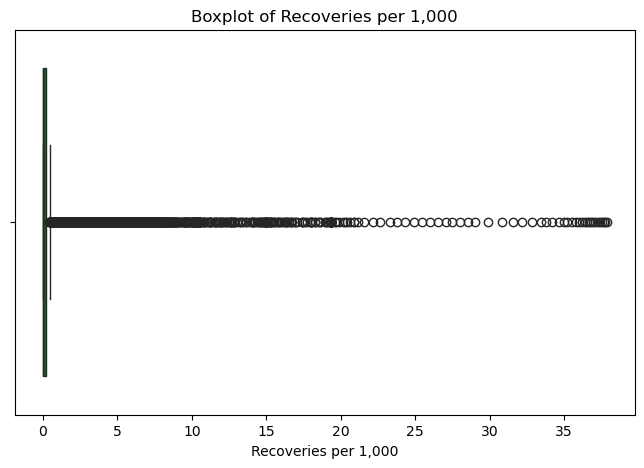

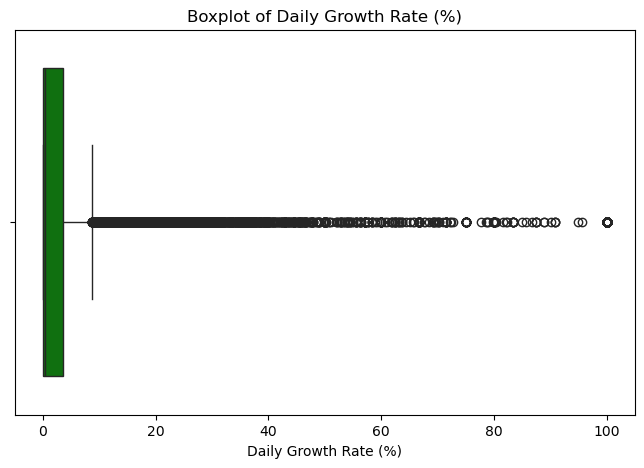

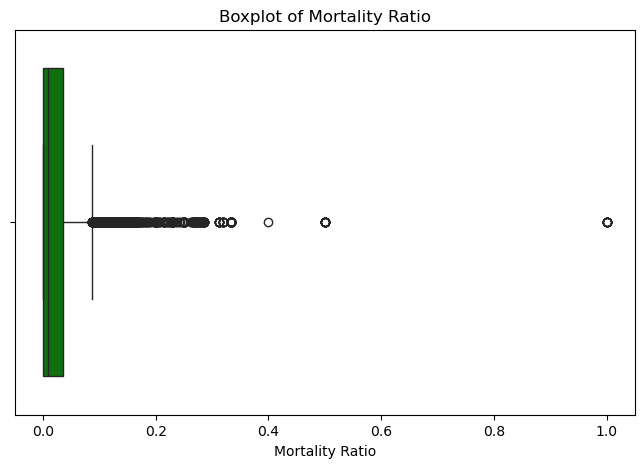

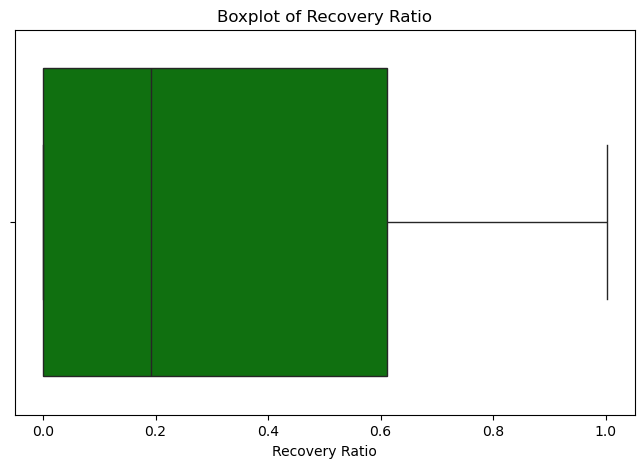

In [57]:

# Select key features for distribution analysis
key_features = ['Cases per 1,000', 'Deaths per 1,000', 'Recoveries per 1,000', 
                'Daily Growth Rate (%)', 'Mortality Ratio', 'Recovery Ratio']

# Create histograms
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Create boxplots
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[feature], color='green')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()


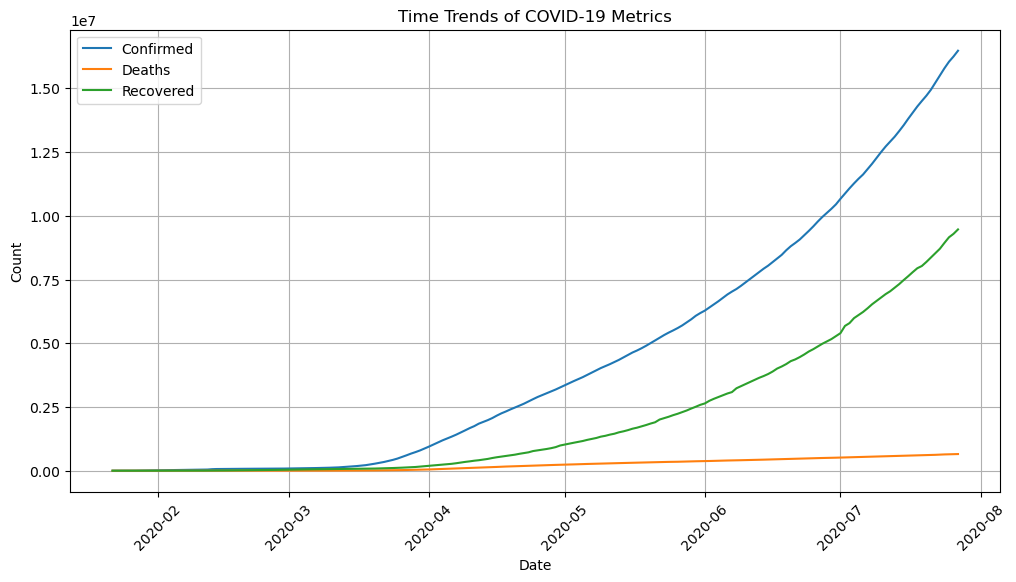

In [58]:
# Trend Analysis: Time-based trends
import matplotlib.dates as mdates

# Group data by date and calculate daily sums
time_trends = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plot time-based trends
plt.figure(figsize=(12, 6))
for column in time_trends.columns:
    plt.plot(time_trends.index, time_trends[column], label=column)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Time Trends of COVID-19 Metrics')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


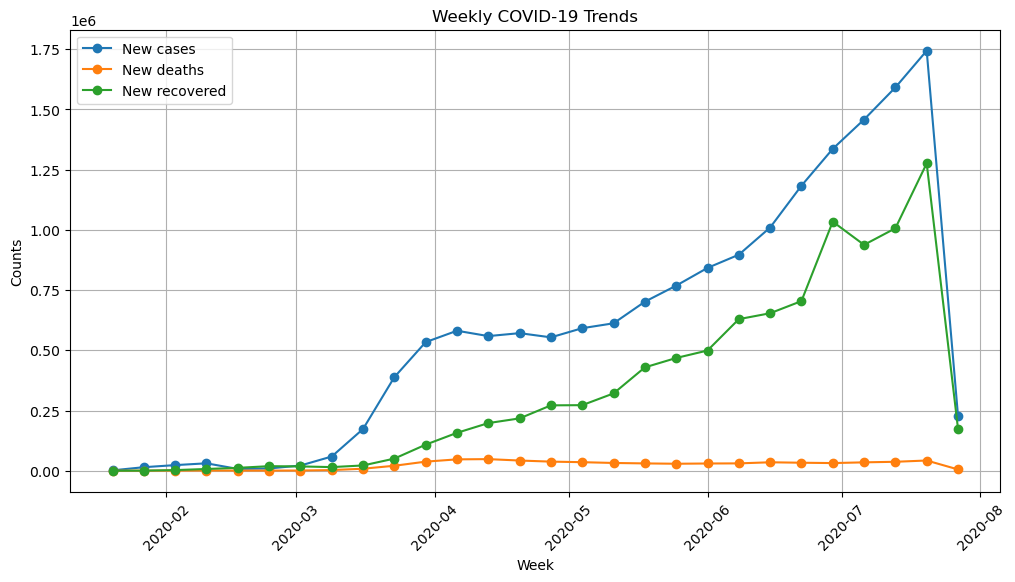

In [59]:
# Aggregate data by week
# The x-axis represents weekly data, with trends for new cases, deaths, and recoveries shown as smooth lines.


df['Week'] = df['Date'].dt.to_period('W').dt.start_time
weekly_trends = df.groupby('Week')[['New cases', 'New deaths', 'New recovered']].sum()

# Plot weekly trends using a line plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_trends.index, weekly_trends['New cases'], label='New cases', marker='o')
plt.plot(weekly_trends.index, weekly_trends['New deaths'], label='New deaths', marker='o')
plt.plot(weekly_trends.index, weekly_trends['New recovered'], label='New recovered', marker='o')

# Add titles and labels
plt.title("Weekly COVID-19 Trends")
plt.xlabel("Week")
plt.ylabel("Counts")
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)  # Rotate x-axis for better readability
plt.show()

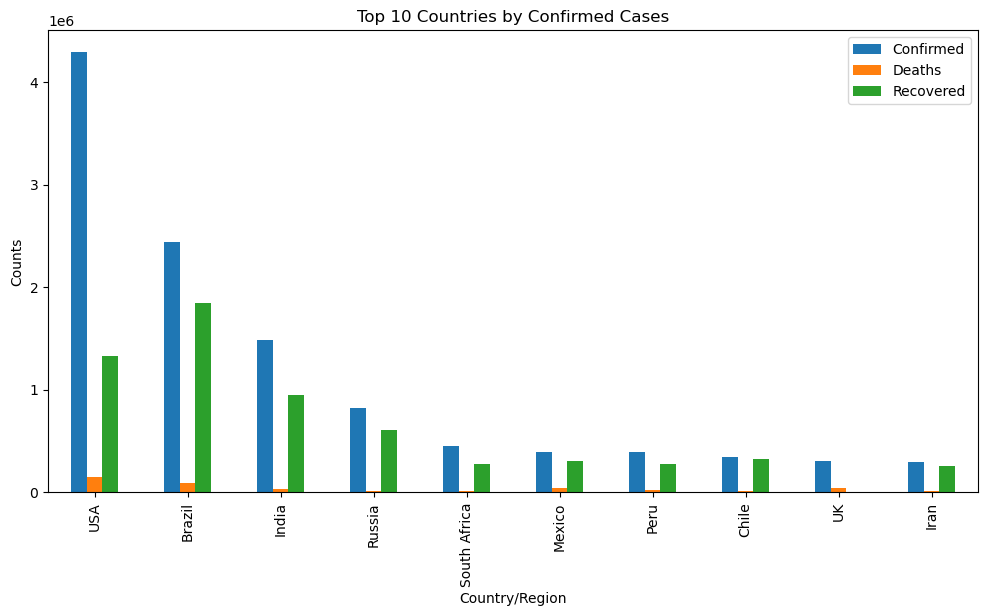

In [101]:
top_countries = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].max().sort_values(by='Confirmed', ascending=False).head(10)

top_countries.plot(kind='bar', figsize=(12, 6), title="Top 10 Countries by Confirmed Cases")
plt.ylabel("Counts")
plt.show()

## Compare growth in China with the top 10 countries in terms of confirmed cases

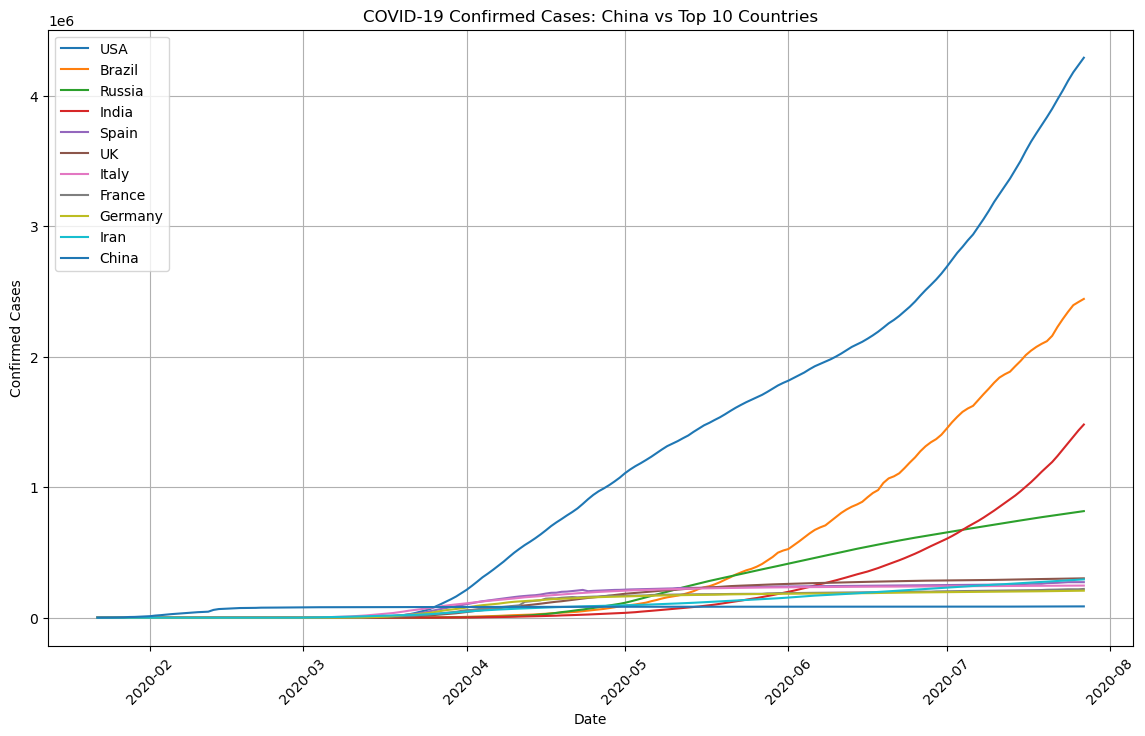

In [60]:
# Group data by Country/Region to calculate total confirmed cases
total_cases_by_country = df.groupby('Country/Region')['Confirmed'].sum()

# Identify the top 10 countries with the highest confirmed cases
top_10_countries = total_cases_by_country.nlargest(10).index.tolist()

# Add China to the list if not already present
if 'China' not in top_10_countries:
    top_10_countries.append('China')

# Filter data for top 10 countries and China
filtered_data = df[df['Country/Region'].isin(top_10_countries)]

# Aggregate by Date and Country/Region
country_trends = filtered_data.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()

# Plot time trends for each country
plt.figure(figsize=(14, 8))
for country in top_10_countries:
    country_data = country_trends[country_trends['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

plt.title('COVID-19 Confirmed Cases: China vs Top 10 Countries')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_15428\1309502722.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cases per 1k'] = (filtered_data['Confirmed'] / filtered_data['Population']) * 1000


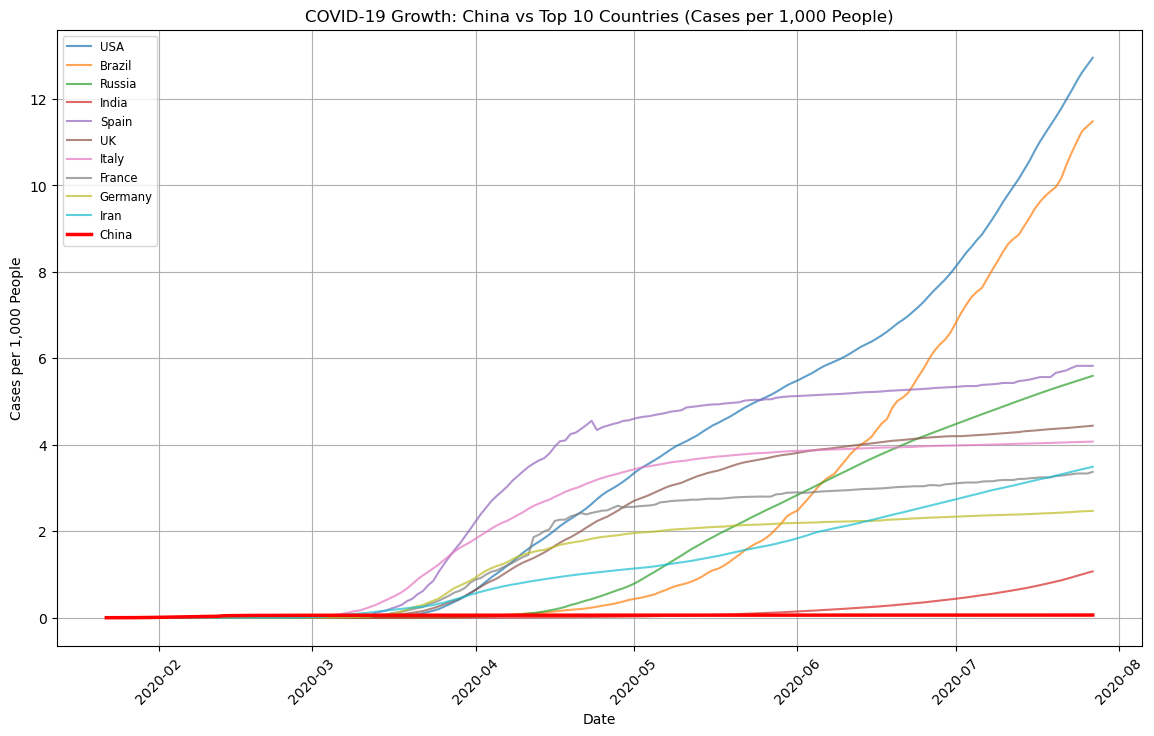

In [61]:
# Group data by Country/Region to calculate total confirmed cases
total_cases_by_country = df.groupby('Country/Region')['Confirmed'].sum()

# Identify the top 10 countries with the highest confirmed cases
top_10_countries = total_cases_by_country.nlargest(10).index.tolist()

# Add China to the list for comparison
if 'China' not in top_10_countries:
    top_10_countries.append('China')

# Filter data for the selected countries
filtered_data = df[df['Country/Region'].isin(top_10_countries)]

# Normalize cases per 1,000 people for fair comparison
filtered_data['Cases per 1k'] = (filtered_data['Confirmed'] / filtered_data['Population']) * 1000

# Aggregate by Date and Country/Region
country_trends = filtered_data.groupby(['Date', 'Country/Region'])['Cases per 1k'].sum().reset_index()

# Plot time trends for each country
plt.figure(figsize=(14, 8))
for country in top_10_countries:
    country_data = country_trends[country_trends['Country/Region'] == country]
    if country == 'China':
        plt.plot(country_data['Date'], country_data['Cases per 1k'], label=country, linewidth=2.5, color='red')
    else:
        plt.plot(country_data['Date'], country_data['Cases per 1k'], label=country, alpha=0.7)

plt.title('COVID-19 Growth: China vs Top 10 Countries (Cases per 1,000 People)')
plt.xlabel('Date')
plt.ylabel('Cases per 1,000 People')
plt.legend(loc='upper left', fontsize='small')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [62]:
# Aggregate by Date and Country/Region for counts
country_counts = (
    filtered_data.groupby(['Date', 'Country/Region'])['Confirmed']
    .sum()
    .unstack('Country/Region')  # Pivot for better tabular view
)

# Display the counts for the top 10 countries and China
country_counts.head(1000)  # Show the first few rows

Country/Region,Brazil,China,France,Germany,India,Iran,Italy,Russia,Spain,UK,USA
Date,,,,,,,,,,,
2020-01-22,0,548,0,0,0,0,0,0,0,0,1
2020-01-23,0,643,0,0,0,0,0,0,0,0,1
2020-01-24,0,920,2,0,0,0,0,0,0,0,2
2020-01-25,0,1406,3,0,0,0,0,0,0,0,2
2020-01-26,0,2075,3,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-23,2287475,86045,216667,204881,1288108,284034,245338,793720,270166,298731,4038816
2020-07-24,2343366,86202,217797,205623,1337024,286523,245590,799499,272421,299500,4112531
2020-07-25,2394513,86381,217801,206278,1385635,288839,245864,805332,272421,300270,4178970


In [64]:
# List numerical columns for further distribution checks
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns

['Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'New cases',
 'New deaths',
 'New recovered',
 'Population',
 'Daily Growth Rate (%)',
 'Mortality Ratio',
 'Recovery Ratio',
 'Cases per 1,000',
 'Deaths per 1,000',
 'Recoveries per 1,000']

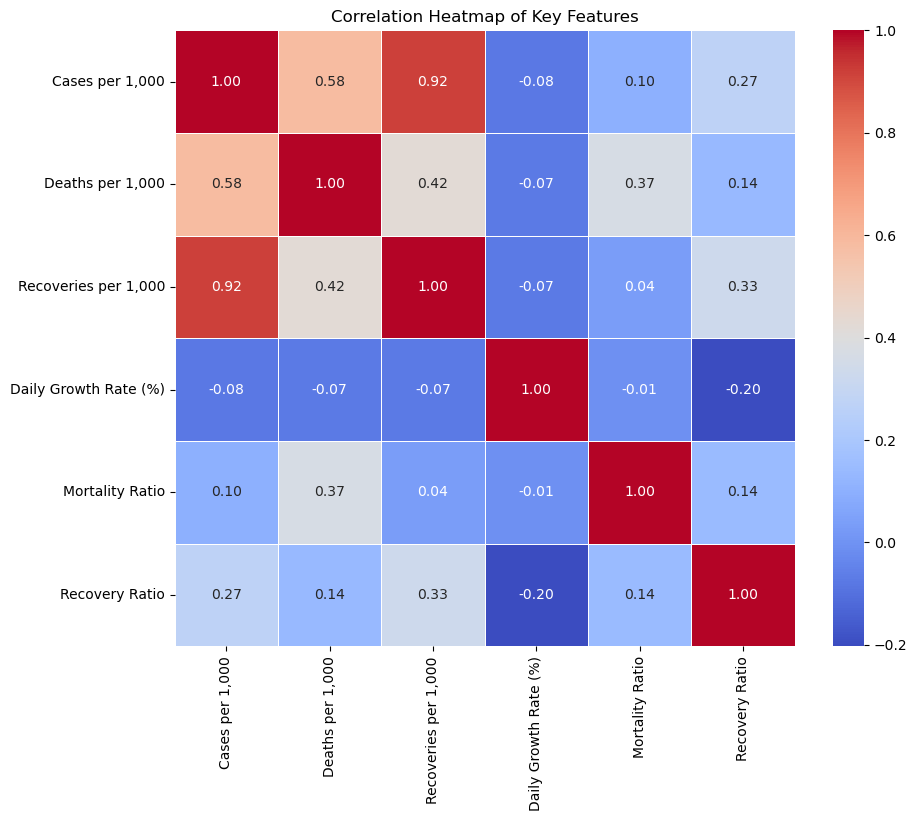

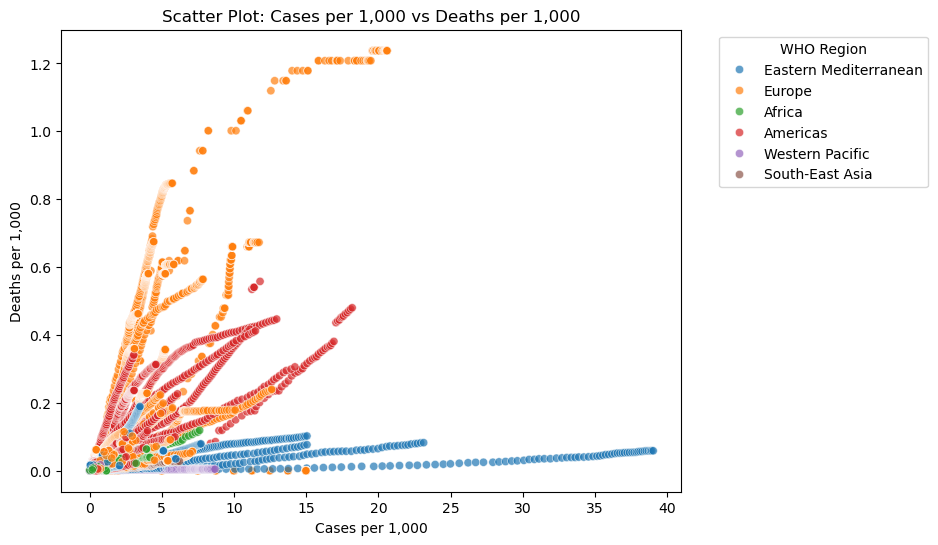

In [67]:
# Select numerical columns for correlation analysis
numerical_features = ['Cases per 1,000', 'Deaths per 1,000', 'Recoveries per 1,000', 
                'Daily Growth Rate (%)', 'Mortality Ratio', 'Recovery Ratio']

# Compute the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Key Features')
plt.show()

# Scatter plot example for specific pairs
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Cases per 1,000', y='Deaths per 1,000', hue='WHO Region', alpha=0.7)
plt.title('Scatter Plot: Cases per 1,000 vs Deaths per 1,000')
plt.xlabel('Cases per 1,000')
plt.ylabel('Deaths per 1,000')
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

1. Scatter Plot: Cases per 1,000 vs Deaths per 1,000
Observations:
Linear Trend: There seems to be a positive correlation between cases per 1,000 and deaths per 1,000. As confirmed cases increase, the number of deaths also increases proportionally.
Regional Differences:
Americas (Orange): Stand out with the highest values for both cases and deaths per 1,000, indicating a severe impact in terms of both infections and mortality.
Europe (Yellow): Shows a similar trend to the Americas but with slightly lower counts.
Africa & South-East Asia (Green & Purple): Clusters near the lower end of both cases and deaths per 1,000, possibly indicating lower reporting rates or population differences.
Flattening in Deaths: Some regions show high cases but a smaller relative increase in deaths, indicating potentially better healthcare responses or population demographics.
Insights:
Policies focusing on mitigating death rates (e.g., enhancing healthcare infrastructure) can help regions with rising cases.
Countries with high mortality (steeper slopes) require targeted intervention for vulnerable populations.
2. Correlation Heatmap
Key Insights:
Strong Positive Correlation:
Cases per 1k vs Recoveries per 1k (0.92): Higher confirmed cases naturally lead to higher recoveries, assuming adequate healthcare capacity.
Cases per 1k vs Deaths per 1k (0.58): Indicates that mortality increases with rising cases, but not at the same magnitude as recoveries.
Weak Negative Correlation:
Daily Growth Rate (%) vs All Other Features: Suggests that higher cumulative values (cases, deaths, recoveries) often result in slower growth rates due to larger denominators or saturation effects.
Mortality Ratio:
Weak correlation with other features (0.37 with Deaths per 1k and 0.10 with Cases per 1k), which implies mortality ratios may depend on external factors like demographics or healthcare quality rather than case counts alone.
Policy Implications:
Mortality Monitoring: Focus on countries with increasing mortality ratios, as they may indicate overwhelmed healthcare systems.
Growth Rates: High growth rates in regions with low current case counts can signal upcoming outbreaks.

In [68]:
# Grouping data by 'Date'
time_trends = df.groupby('Date')[['Cases per 1,000', 'Deaths per 1,000', 'Recoveries per 1,000']].mean().reset_index()

# Calculating Daily Growth Rate
time_trends['Daily Growth Rate (%)'] = time_trends['Cases per 1,000'].pct_change() * 100

# Display the aggregated data (first 5 rows)
time_trends.head()


,Date,"Cases per 1,000","Deaths per 1,000","Recoveries per 1,000",Daily Growth Rate (%)
0,2020-01-22,0.000003,6.518584e-08,1.073649e-07,NaN
1,2020-01-23,0.000004,6.902030e-08,1.150338e-07,54.701838
2,2020-01-24,0.000008,9.969599e-08,1.380406e-07,91.167235
3,2020-01-25,0.000011,1.610474e-07,1.495440e-07,35.005241
4,2020-01-26,0.000016,2.147298e-07,3.844214e-07,48.239163


In [69]:
time_trends.fillna(0, inplace=True)
time_trends.head()

,Date,"Cases per 1,000","Deaths per 1,000","Recoveries per 1,000",Daily Growth Rate (%)
0,2020-01-22,0.000003,6.518584e-08,1.073649e-07,0.000000
1,2020-01-23,0.000004,6.902030e-08,1.150338e-07,54.701838
2,2020-01-24,0.000008,9.969599e-08,1.380406e-07,91.167235
3,2020-01-25,0.000011,1.610474e-07,1.495440e-07,35.005241
4,2020-01-26,0.000016,2.147298e-07,3.844214e-07,48.239163


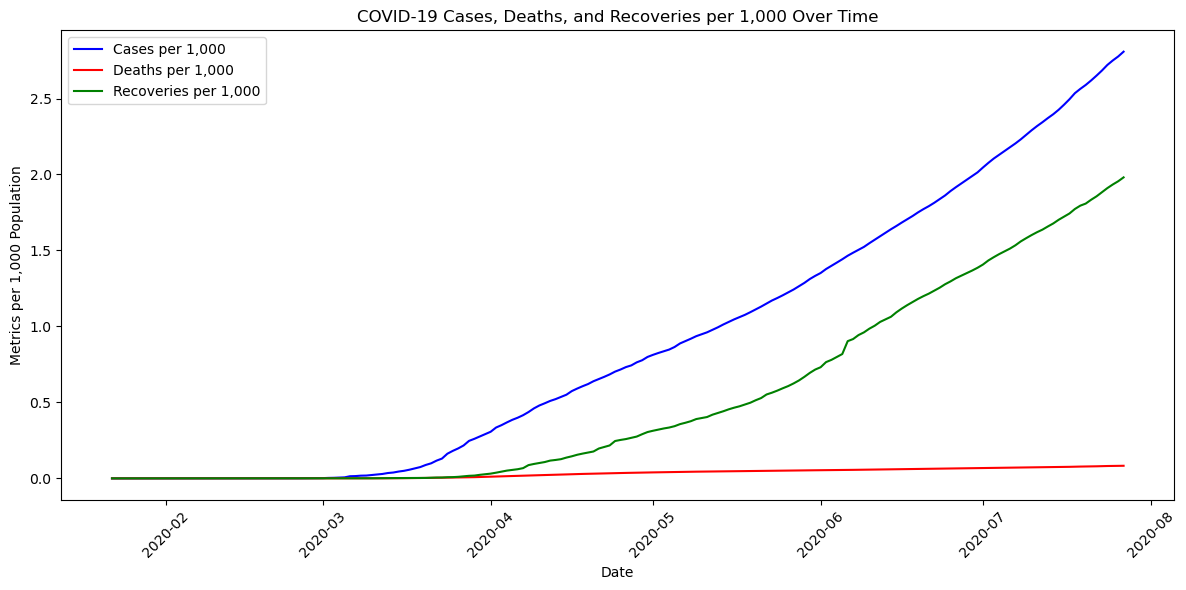

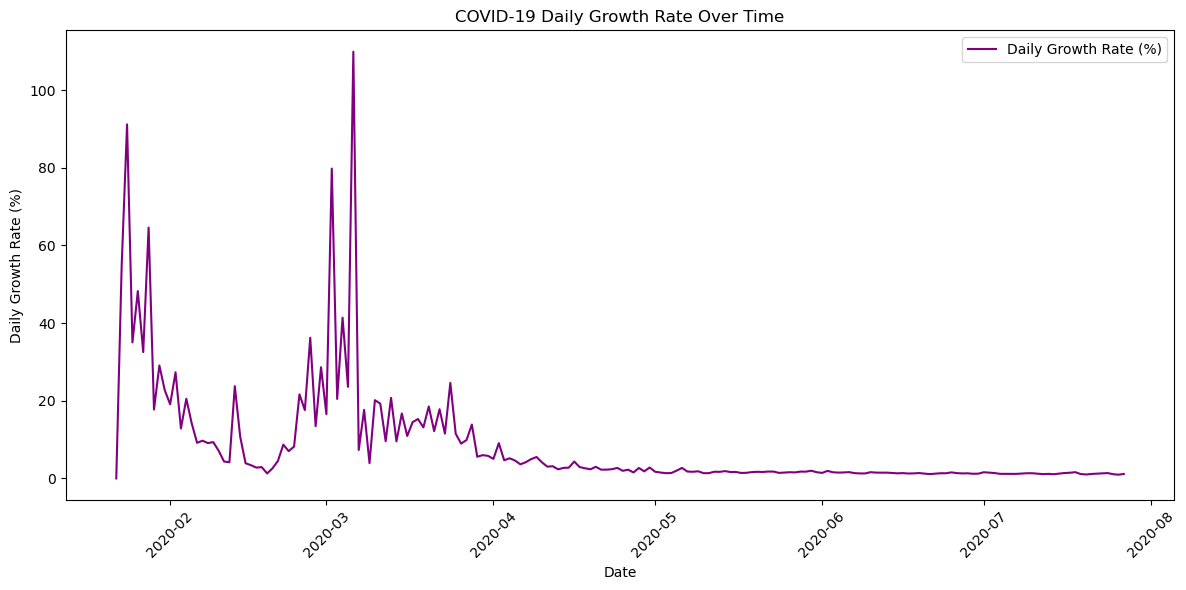

In [70]:
# Line plot of cases, deaths, and recoveries per 1k over time
plt.figure(figsize=(12, 6))
plt.plot(time_trends['Date'], time_trends['Cases per 1,000'], label='Cases per 1,000', color='blue')
plt.plot(time_trends['Date'], time_trends['Deaths per 1,000'], label='Deaths per 1,000', color='red')
plt.plot(time_trends['Date'], time_trends['Recoveries per 1,000'], label='Recoveries per 1,000', color='green')
plt.xlabel('Date')
plt.ylabel('Metrics per 1,000 Population')
plt.title('COVID-19 Cases, Deaths, and Recoveries per 1,000 Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line plot of Daily Growth Rate (%) over time
plt.figure(figsize=(12, 6))
plt.plot(time_trends['Date'], time_trends['Daily Growth Rate (%)'], label='Daily Growth Rate (%)', color='purple')
plt.xlabel('Date')
plt.ylabel('Daily Growth Rate (%)')
plt.title('COVID-19 Daily Growth Rate Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


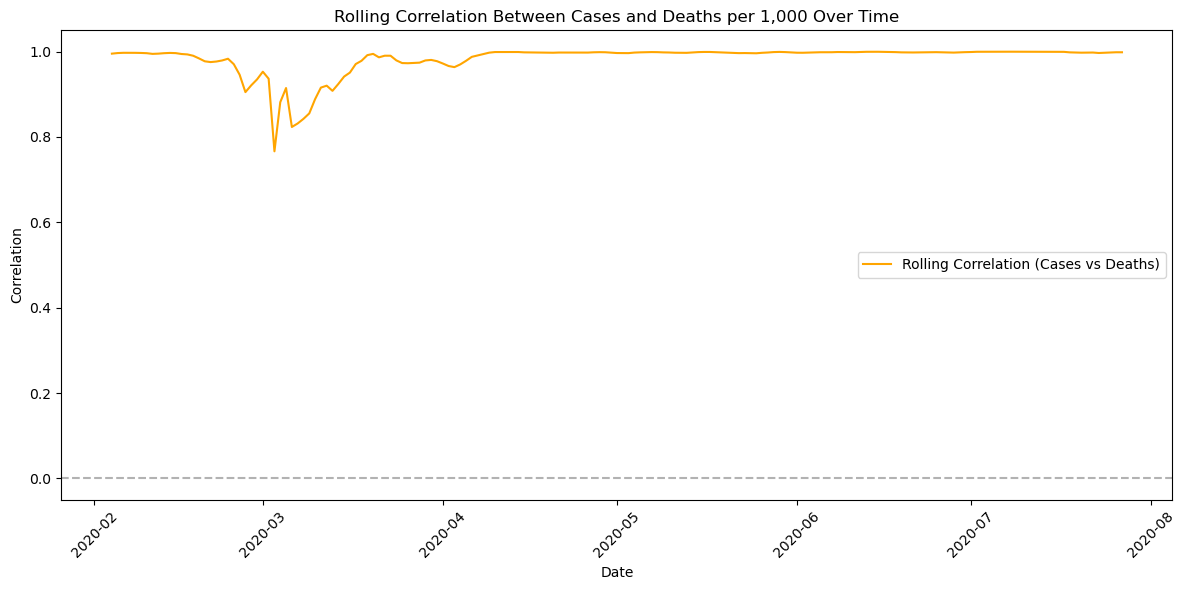

In [71]:
# Rolling correlation between Cases and Deaths per 1k
time_trends['Rolling Correlation'] = time_trends['Cases per 1,000'].rolling(window=14).corr(time_trends['Deaths per 1,000'])

# Plot rolling correlation over time
plt.figure(figsize=(12, 6))
plt.plot(time_trends['Date'], time_trends['Rolling Correlation'], label='Rolling Correlation (Cases vs Deaths)', color='orange')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.title('Rolling Correlation Between Cases and Deaths per 1,000 Over Time')
plt.axhline(0, linestyle='--', color='gray', alpha=0.6)  # Add a horizontal line at 0
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


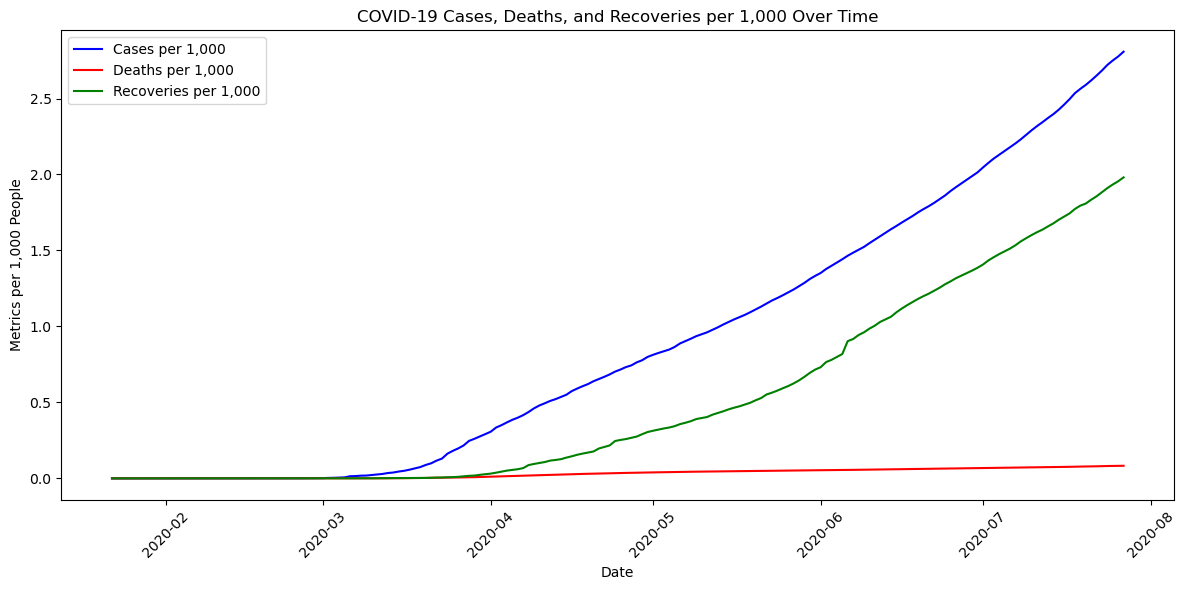

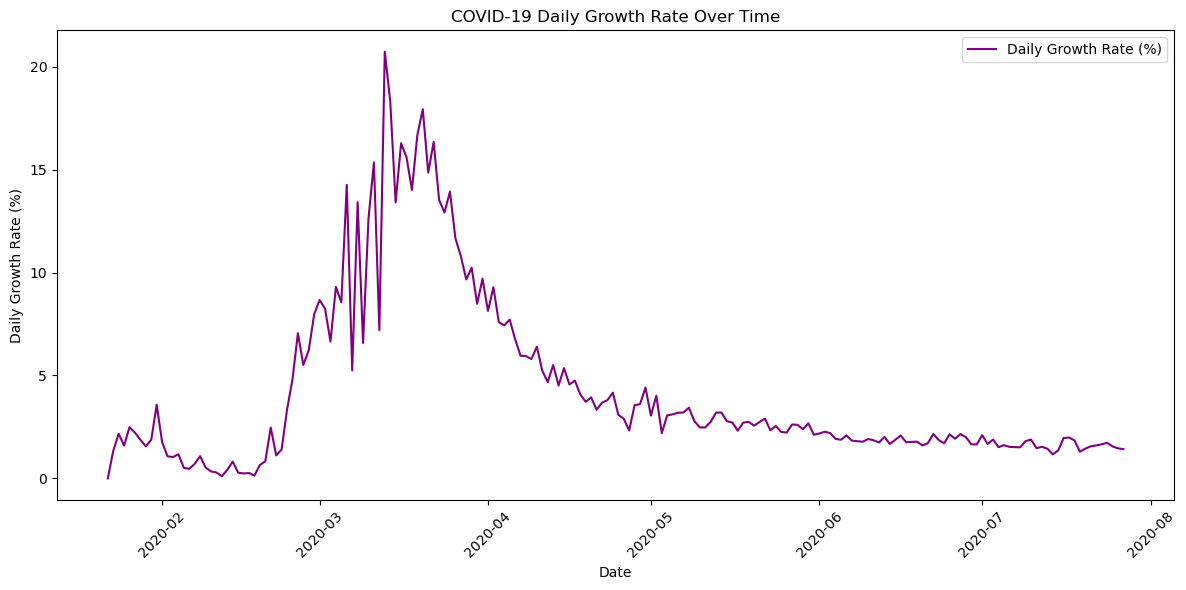

In [74]:
# Aggregating data by 'Date'
time_trends = df.groupby('Date')[['Cases per 1,000', 'Deaths per 1,000', 'Recoveries per 1,000', 'Daily Growth Rate (%)']].mean().reset_index()

# Plot: Cases, Deaths, and Recoveries per 1,000 over time
plt.figure(figsize=(12, 6))
plt.plot(time_trends['Date'], time_trends['Cases per 1,000'], label='Cases per 1,000', color='blue')
plt.plot(time_trends['Date'], time_trends['Deaths per 1,000'], label='Deaths per 1,000', color='red')
plt.plot(time_trends['Date'], time_trends['Recoveries per 1,000'], label='Recoveries per 1,000', color='green')
plt.xlabel('Date')
plt.ylabel('Metrics per 1,000 People')
plt.title('COVID-19 Cases, Deaths, and Recoveries per 1,000 Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot: Daily Growth Rate (%) over time
plt.figure(figsize=(12, 6))
plt.plot(time_trends['Date'], time_trends['Daily Growth Rate (%)'], label='Daily Growth Rate (%)', color='purple')
plt.xlabel('Date')
plt.ylabel('Daily Growth Rate (%)')
plt.title('COVID-19 Daily Growth Rate Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [77]:
df.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region', 'Population',
       'Daily Growth Rate (%)', 'Mortality Ratio', 'Recovery Ratio',
       'Cases per 1,000', 'Deaths per 1,000', 'Recoveries per 1,000', 'Week'],
      dtype='object')

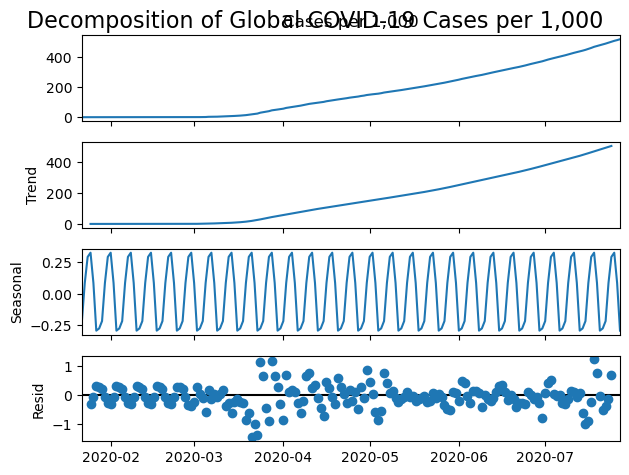

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate global daily cases
global_trend = df.groupby('Date')['Cases per 1,000'].sum()

# Decompose time series
decomposition = seasonal_decompose(global_trend, model='additive', period=7)

# Plotting decomposition
decomposition.plot()
plt.suptitle('Decomposition of Global COVID-19 Cases per 1,000', fontsize=16)
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_15428\3509830700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='WHO Region', y='Mortality Ratio', palette='Set2')


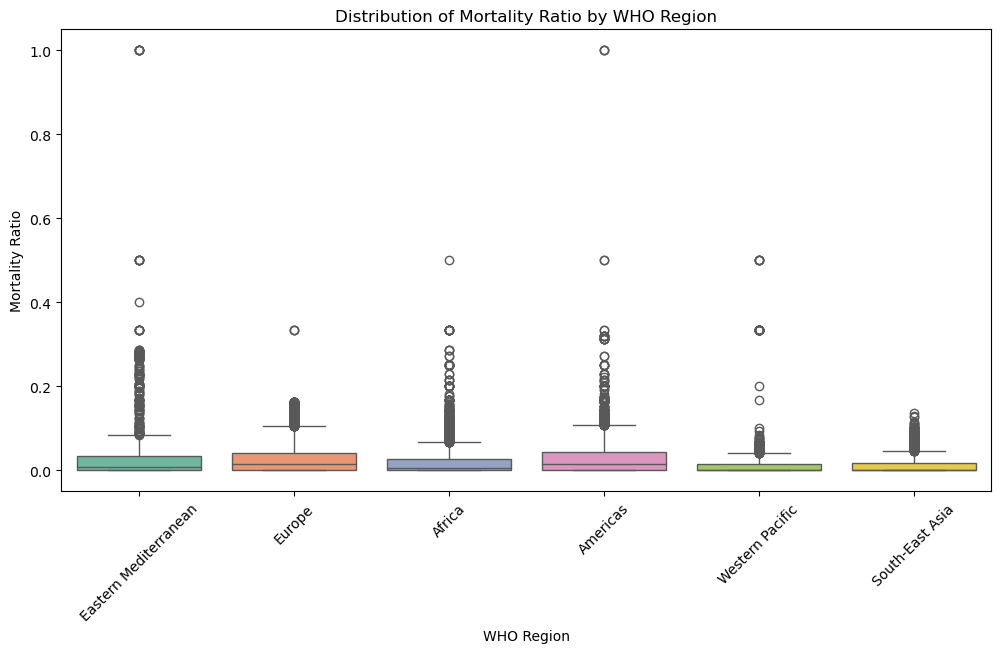

C:\Users\Dell\AppData\Local\Temp\ipykernel_15428\3509830700.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='WHO Region', y='Recovery Ratio', palette='Set3')


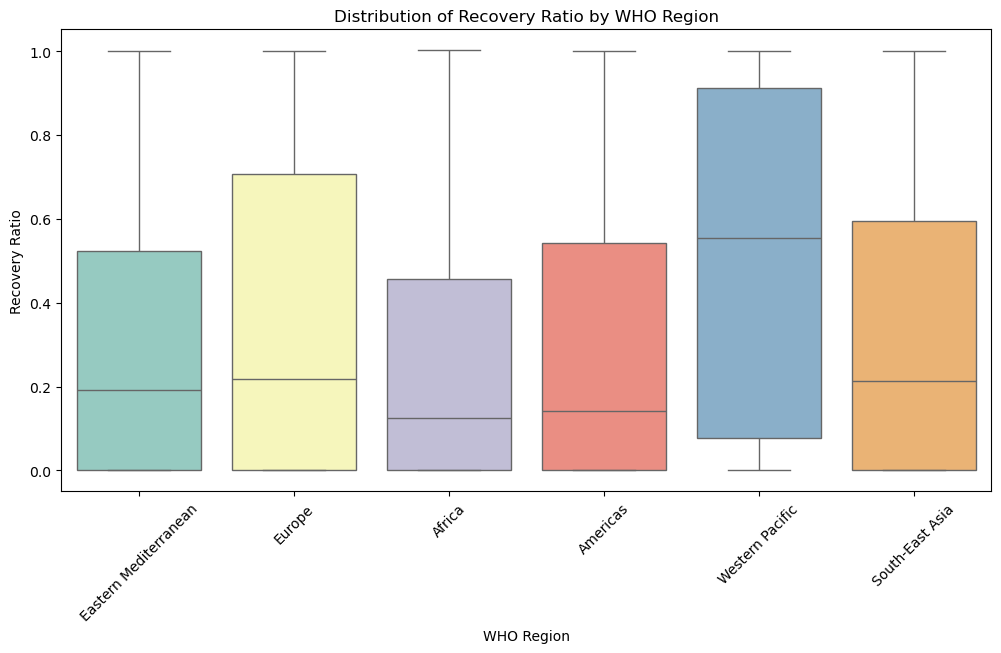

In [81]:
# Boxplot for Mortality Ratio across WHO Regions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='WHO Region', y='Mortality Ratio', palette='Set2')
plt.title('Distribution of Mortality Ratio by WHO Region')
plt.xticks(rotation=45)
plt.show()

# Boxplot for Recovery Ratio across WHO Regions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='WHO Region', y='Recovery Ratio', palette='Set3')
plt.title('Distribution of Recovery Ratio by WHO Region')
plt.xticks(rotation=45)
plt.show()


In [82]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
clustering_features = ['Cases per 1,000', 'Deaths per 1,000', 'Daily Growth Rate (%)', 'Recovery Ratio', 'Mortality Ratio']

# Filter the data for clustering
clustering_data = df[clustering_features].dropna()  # Drop rows with missing values

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Convert back to DataFrame for clarity
scaled_clustering_data = pd.DataFrame(scaled_data, columns=clustering_features)


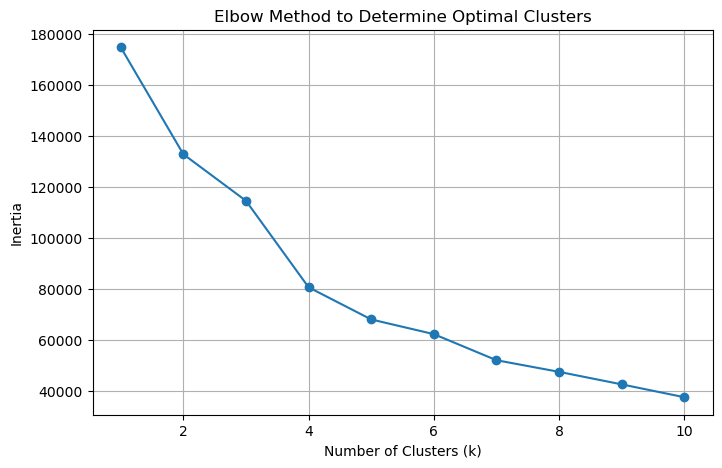

In [83]:
from sklearn.cluster import KMeans

# Find the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [85]:
# Optimal number of clusters (you can replace k with the elbow point value)
optimal_k = 3

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
df['Cluster'] = clusters


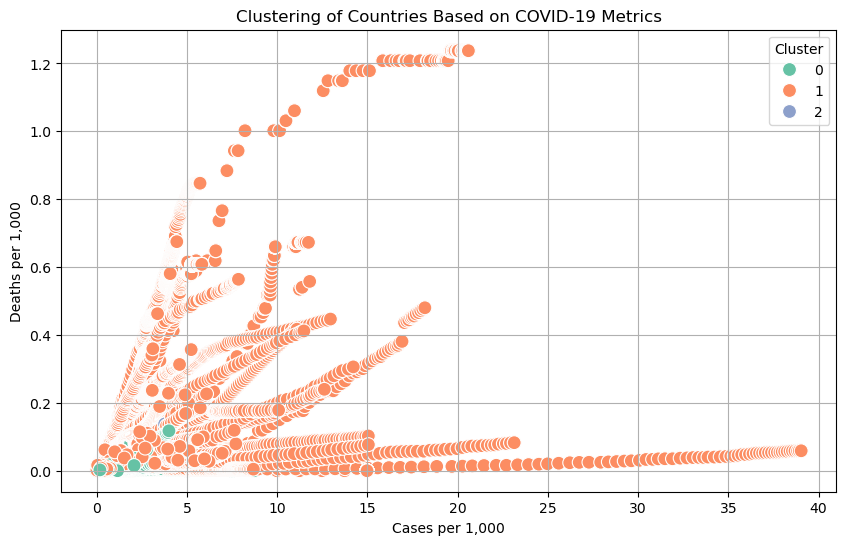

In [87]:
# Scatter plot for two key features colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cases per 1,000', y='Deaths per 1,000', hue='Cluster', palette='Set2', s=100)
plt.title('Clustering of Countries Based on COVID-19 Metrics')
plt.xlabel('Cases per 1,000')
plt.ylabel('Deaths per 1,000')
plt.legend(title='Cluster')
plt.grid()
plt.show()


In [88]:
# Cluster analysis
cluster_analysis = df.groupby('Cluster')[clustering_features].mean()
print(cluster_analysis)

         Cases per 1,000  Deaths per 1,000  Daily Growth Rate (%)  \
Cluster                                                             
0               0.184467          0.003590               3.423076   
1               2.108728          0.082656               1.209087   
2               0.047457          0.000601              55.312712   

         Recovery Ratio  Mortality Ratio  
Cluster                                   
0              0.105921         0.013025  
1              0.687615         0.043877  
2              0.047868         0.020772  


In [89]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
clustering_features = ['Cases per 1,000', 'Deaths per 1,000', 'Daily Growth Rate (%)', 'Recovery Ratio', 'Mortality Ratio']

# Filter the data for clustering
clustering_data = df[clustering_features].dropna()  # Drop rows with missing values

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Convert back to DataFrame for clarity
scaled_clustering_data = pd.DataFrame(scaled_data, columns=clustering_features)

print("Data prepared for clustering. Here's a preview:")
print(scaled_clustering_data.head())


Data prepared for clustering. Here's a preview:
   Cases per 1,000  Deaths per 1,000  Daily Growth Rate (%)  Recovery Ratio  \
0         -0.34634         -0.281906              -0.378219       -0.933695   
1         -0.34634         -0.281906              -0.378219       -0.933695   
2         -0.34634         -0.281906              -0.378219       -0.933695   
3         -0.34634         -0.281906              -0.378219       -0.933695   
4         -0.34634         -0.281906              -0.378219       -0.933695   

   Mortality Ratio  
0        -0.583841  
1        -0.583841  
2        -0.583841  
3        -0.583841  
4        -0.583841  


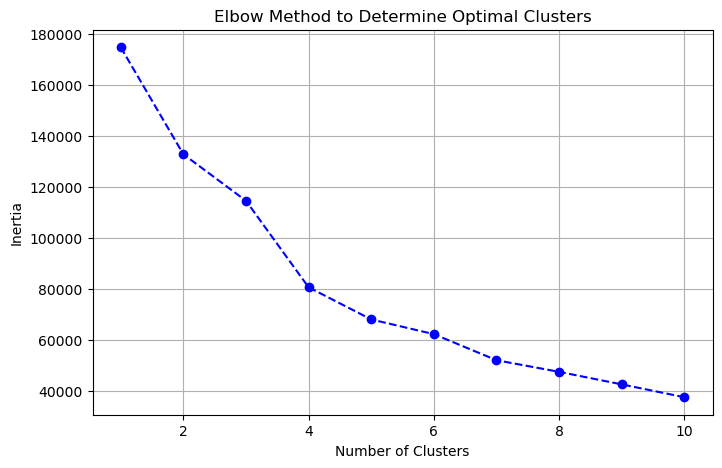

In [90]:

# Calculate the inertia for a range of cluster numbers
inertia = []
cluster_range = range(1, 11)  # Test for 1 to 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_clustering_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [91]:
# Replace optimal_k with the value determined from the Elbow Method
optimal_k = 3  # Example, replace with your selected number of clusters

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_clustering_data)

# Add cluster labels to the original dataset
df['Cluster'] = clusters

print("Clustering completed. Here's the count of countries in each cluster:")
print(df['Cluster'].value_counts())


Clustering completed. Here's the count of countries in each cluster:
Cluster
0    20950
1    12939
2     1079
Name: count, dtype: int64


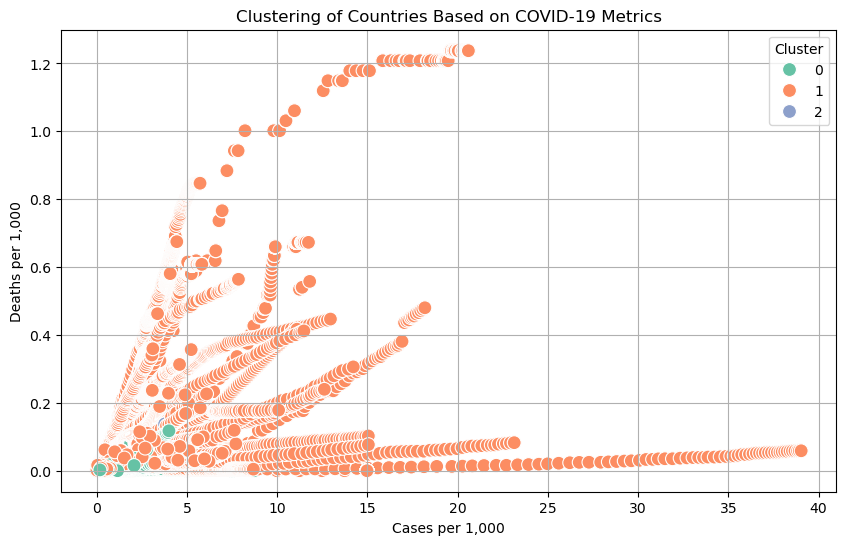

In [92]:
# Scatter plot for two key metrics colored by clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Cases per 1,000', 
    y='Deaths per 1,000', 
    hue='Cluster', 
    palette='Set2', 
    s=100
)
plt.title('Clustering of Countries Based on COVID-19 Metrics')
plt.xlabel('Cases per 1,000')
plt.ylabel('Deaths per 1,000')
plt.legend(title='Cluster')
plt.grid()
plt.show()


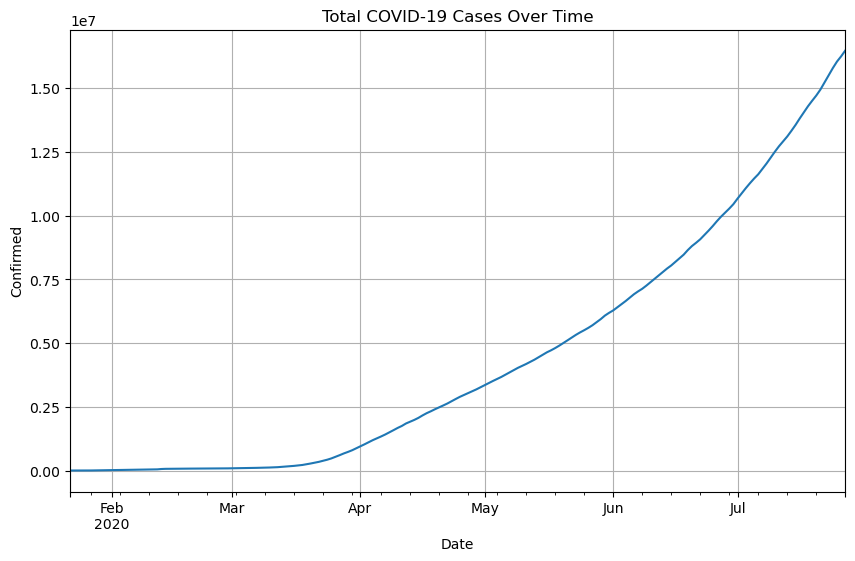

In [94]:
# Prepare the Data for Time-Series Modeling
# Let’s choose the Total Cases and aggregate the data by date:

# Convert the date column to datetime format (if necessary)
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and sum up the cases globally
daily_cases = df.groupby('Date')['Confirmed'].sum()

# Plot to visualize the trend
plt.figure(figsize=(10, 6))
daily_cases.plot()
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.grid()
plt.show()


In [95]:
# ARIMA Model for Forecasting
# ARIMA models can be sensitive to the stationarity of data. So, let’s check if the data is stationary, and if not, we’ll transform it.

from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test to check for stationarity
result = adfuller(daily_cases)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 2.0547058425955234
p-value: 0.9987399533676004


The Augmented Dickey-Fuller (ADF) test results show a p-value of 0.9987, which is much higher than the 0.05 threshold.
This indicates that the time series is non-stationary and needs to be transformed to become stationary before we can proceed with the ARIMA model.

To address this, we’ll apply differencing to make the series stationary.
Differencing means subtracting the previous observation from the current observation.

In [96]:
# Apply differencing to make the series stationary
daily_cases_diff = daily_cases.diff().dropna()

# Perform the ADF test again to check if the differenced series is stationary
result_diff = adfuller(daily_cases_diff)
print(f"ADF Statistic (Differenced): {result_diff[0]}")
print(f"p-value (Differenced): {result_diff[1]}")


ADF Statistic (Differenced): 0.5711803178516355
p-value (Differenced): 0.9868833069283589


The p-value of the differenced series is still 0.9869, which is still much higher than the 0.05 threshold.
This indicates that the differenced series is still non-stationary.

At this point, we can try further differencing (second differencing) to ensure the series becomes stationary. Let's apply second differencing

In [97]:
# Apply second differencing
daily_cases_diff2 = daily_cases_diff.diff().dropna()

# Perform the ADF test again to check if the second differenced series is stationary
result_diff2 = adfuller(daily_cases_diff2)
print(f"ADF Statistic (Second Differenced): {result_diff2[0]}")
print(f"p-value (Second Differenced): {result_diff2[1]}")


ADF Statistic (Second Differenced): -2.221535470227262
p-value (Second Differenced): 0.19852236776162302


The p-value of 0.1985 for the second differenced series is still greater than 0.05, indicating that the series is still non-stationary.

Since the time series is still not stationary after first and second differencing,
it's possible that other transformations, such as log transformation or seasonal differencing, may be needed.

In [99]:
# Apply log transformation to stabilize the variance
daily_cases_log = np.log(daily_cases[daily_cases > 0])

# Apply first differencing to the log-transformed series
daily_cases_log_diff = daily_cases_log.diff().dropna()

# Perform the ADF test again to check if the log-transformed and differenced series is stationary
result_log_diff = adfuller(daily_cases_log_diff)
print(f"ADF Statistic (Log Transformed + Differenced): {result_log_diff[0]}")
print(f"p-value (Log Transformed + Differenced): {result_log_diff[1]}")


ADF Statistic (Log Transformed + Differenced): -1.6723725317772842
p-value (Log Transformed + Differenced): 0.44540023001435175


In [100]:
# Apply seasonal differencing (with period = 7 days for weekly seasonality)
daily_cases_seasonal_diff = daily_cases.diff(7).dropna()

# Perform the ADF test again
result_seasonal_diff = adfuller(daily_cases_seasonal_diff)
print(f"ADF Statistic (Seasonal Differenced): {result_seasonal_diff[0]}")
print(f"p-value (Seasonal Differenced): {result_seasonal_diff[1]}")


ADF Statistic (Seasonal Differenced): 1.1019290496095677
p-value (Seasonal Differenced): 0.9952330526336057
